In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/project

Mounted at /content/drive
/content/drive/My Drive/project


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.probability import FreqDist

In [3]:
d = pd.read_csv('names_indian.csv')

# Preprocessing

In [4]:
d.head()

,Name,Target
0,Aabha,0
1,Aabriella,0
2,Aada,0
3,Aadhira,0
4,Aadhya,0


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95026 entries, 0 to 95025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    95026 non-null  object
 1   Target  95026 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
len(d['Name'].unique())

95026

([<matplotlib.axis.XTick at 0x7f3584aacf10>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

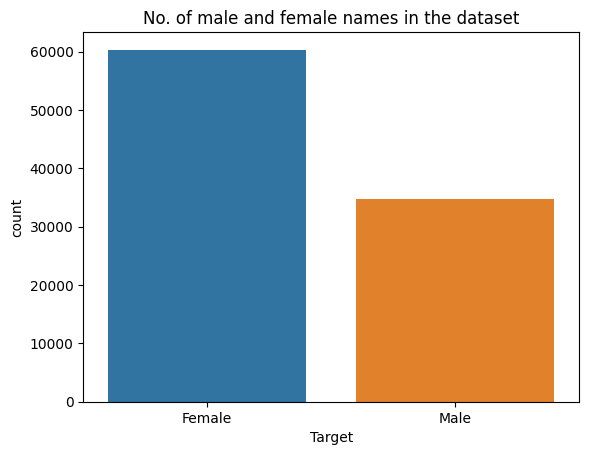

In [7]:
sns.countplot(x='Target',data=d)
plt.title('No. of male and female names in the dataset')
plt.xticks([0,1],('Female','Male'))

## Count of starting letter

In [8]:
alphabets=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S',
           'T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:
  startletter_count[i] = len(d[d['Name'].str.startswith(i)])

start_letter = pd.DataFrame(startletter_count, index=['count'])
start_letter

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,9944,3408,5661,6495,3558,1264,2225,1992,1477,7702,...,534,4291,7792,6203,286,1459,996,250,1510,1783


Text(0.5, 1.0, 'Number of names starting with each letter')

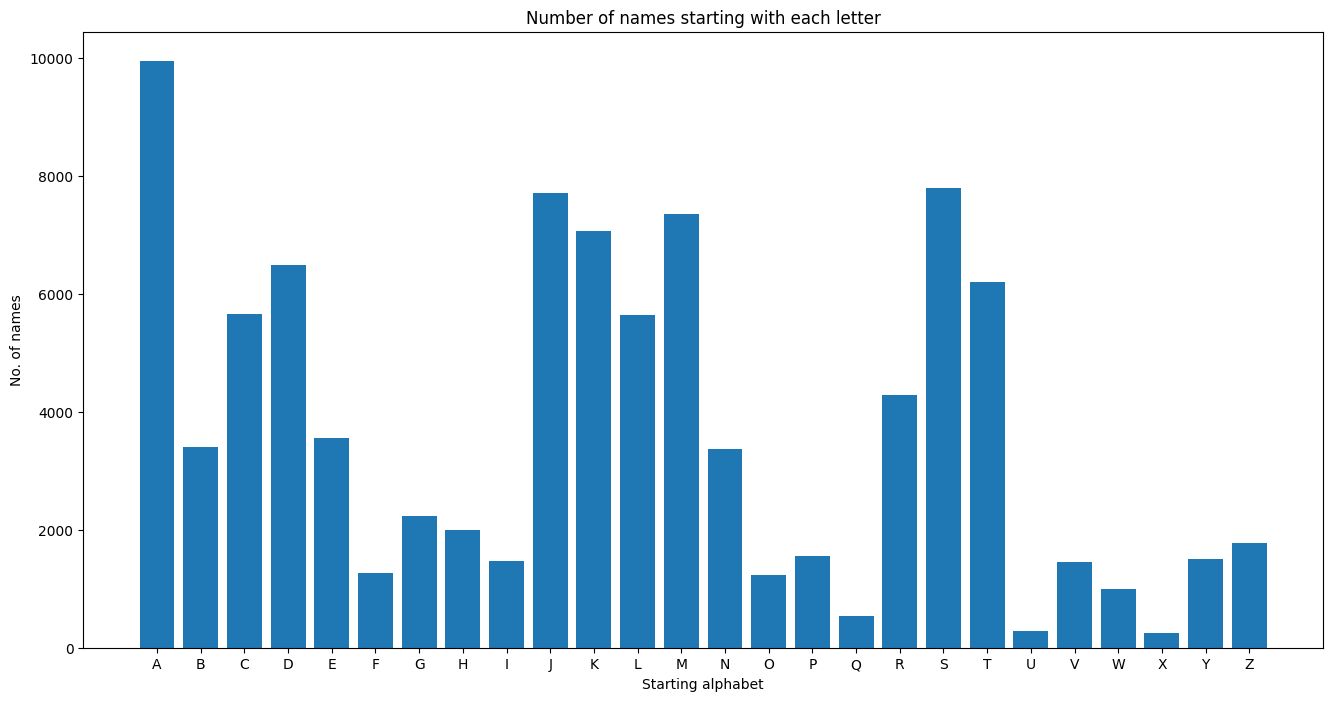

In [9]:
plt.figure(figsize = (16,8))
plt.bar(startletter_count.keys(),startletter_count.values())
plt.xlabel('Starting alphabet')
plt.ylabel('No. of names')
plt.title('Number of names starting with each letter')

In [10]:
print('The 5 most name starting letters are : ',
       *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('A', 9944) ('S', 7792) ('J', 7702) ('M', 7353) ('K', 7062)


## Count of ending letter

In [11]:
small_alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']
endletter_count ={}

for i in small_alphabets:
    endletter_count[i]=len(d[d['Name'].str.endswith(i)])

end_letter = pd.DataFrame(endletter_count, index=['count'])
end_letter

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,x,y,z
count,28031,289,281,1677,14901,176,381,5473,4845,124,...,124,67,2997,3671,1403,433,137,164,5125,496


Text(0.5, 1.0, 'Number of names ending with each letter')

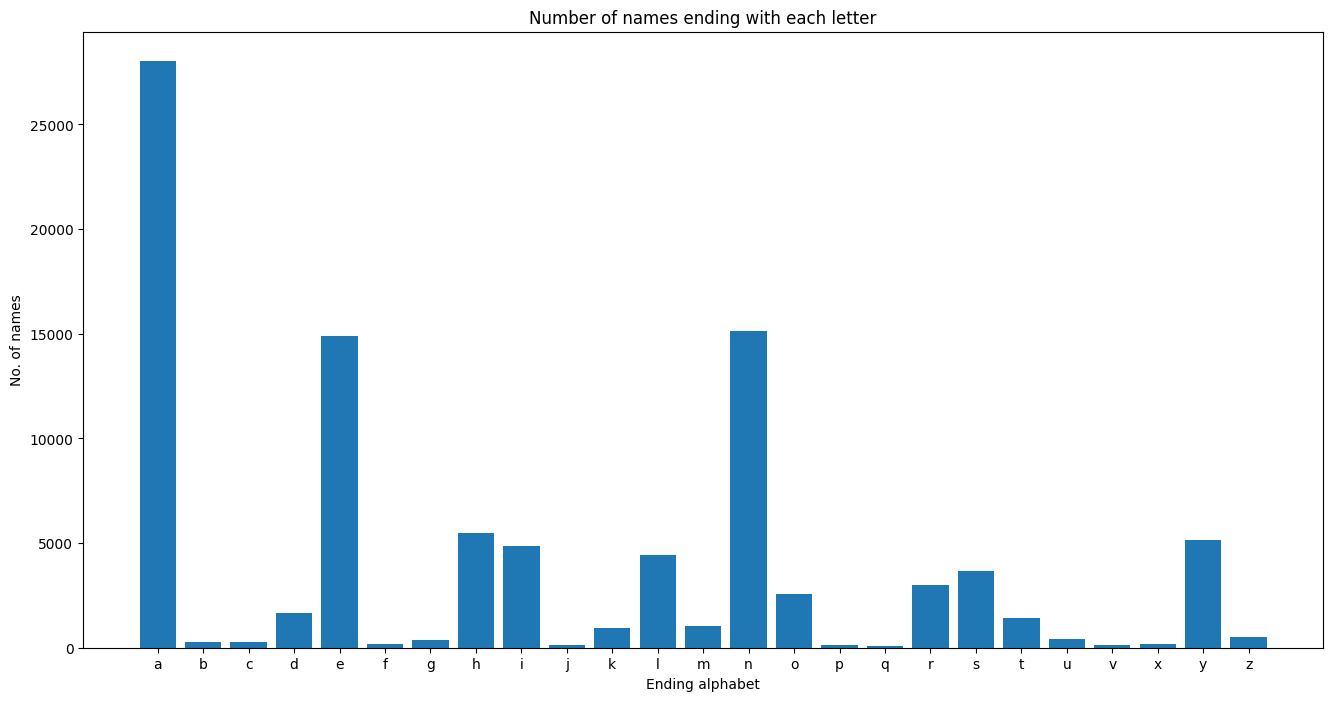

In [12]:
plt.figure(figsize = (16,8))
plt.bar(endletter_count.keys(),endletter_count.values())
plt.xlabel('Ending alphabet')
plt.ylabel('No. of names')
plt.title('Number of names ending with each letter')

In [13]:
print('The 5 most name ending letters are : ', *sorted(endletter_count.items(),
        key=lambda item: item[1])[-5:][::-1])

The 5 most name ending letters are :  ('a', 28031) ('n', 15141) ('e', 14901) ('h', 5473) ('y', 5125)


## Name lengths

In [14]:
N = set(d['Name'])
fdist1 = FreqDist(len(n) for n in N)
fdist1.tabulate()

    6     7     5     8     9     4    10     3    11    12     2    13    14    15 
26437 24676 15962 13671  5267  5189  1698   951   589   215   148   128    62    33 


In [15]:
fdist1.max()

6

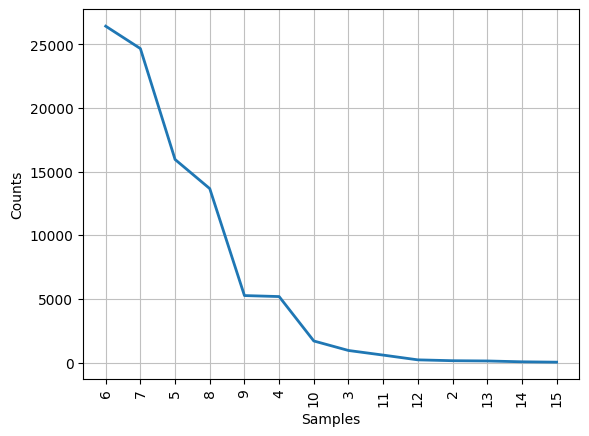

<Axes: xlabel='Samples', ylabel='Counts'>

In [16]:
fdist1.plot()

## Common names wordcloud

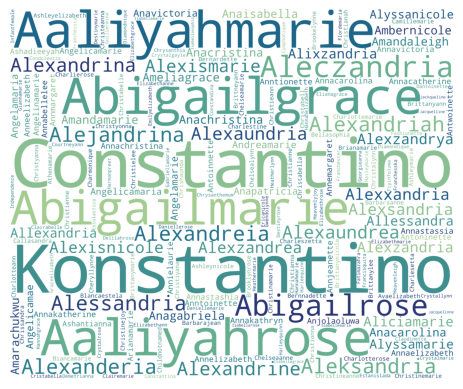

In [17]:
text =  " ".join(i for i in d.Name if len(i)>10)

word_cloud = WordCloud(
        width=6000,
        height=5000,
        random_state=1,
        background_color="white",
        colormap="crest",
        collocations=False,
        ).generate(text)

plt.imshow(word_cloud)
plt.axis("off")    
plt.show()

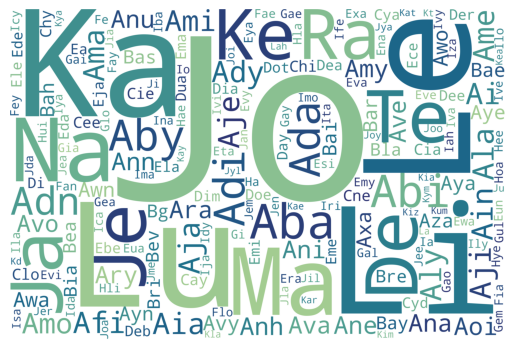

In [18]:
text =  " ".join(i for i in d.Name if len(i)<4)

word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        colormap="crest",
        collocations=False,
        ).generate(text)

plt.imshow(word_cloud)
plt.axis("off")    
plt.show()

# ML modelling

In [19]:
# Defining the predictor variable as “X” and the target variable as “Y”. 
# In our case ‘Name’ is the predictor and ‘Target’ is the target variable.

X =list( d['Name'])
Y = list(d['Target'])

In [20]:
# Label encoding using Sklearn to convert data to machine readable format.

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
Y = encoder.fit_transform(Y)

In [21]:
# Vectorizing the names into vector-like data to make the modeling process easier.

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='char')
X=cv.fit_transform(X).toarray()

In [22]:
# Splitting the dataset into training and testing sets.
# 33% is allocated for testing and rest for initial training of the model.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
# LOGISTIC REGERSSION

from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()
LR_model.fit(x_train,y_train)
LR_y_pred = LR_model.predict(x_test)


In [24]:
# NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB

NB_model= MultinomialNB()
NB_model.fit(x_train,y_train)
NB_y_pred = NB_model.predict(x_test)

In [25]:
# XGBOOST

from xgboost import XGBClassifier

XGB_model = XGBClassifier(use_label_encoder= False)
XGB_model.fit(x_train,y_train)
XGB_y_pred = XGB_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [26]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

def cmatrix(model):
    y_pred = model.predict(x_test)
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)
    sns.heatmap(cmatrix,fmt='d',cmap='crest',annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')

0.7227271277783093
              precision    recall  f1-score   support

           0       0.75      0.85      0.80     19919
           1       0.66      0.50      0.57     11440

    accuracy                           0.72     31359
   macro avg       0.70      0.68      0.68     31359
weighted avg       0.71      0.72      0.71     31359

[[16925  2994]
 [ 5701  5739]]
None


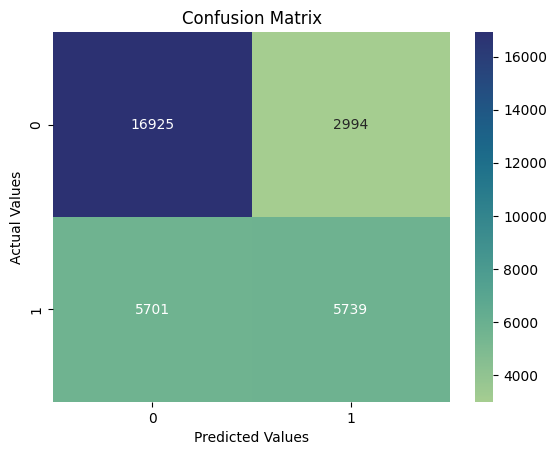

In [27]:
import sklearn.metrics as metrics

#for logistic regression

print(metrics.accuracy_score(LR_y_pred,y_test))
print(metrics.classification_report(y_test, LR_y_pred))
print(cmatrix(LR_model))

0.696737778628145
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     19919
           1       0.64      0.39      0.49     11440

    accuracy                           0.70     31359
   macro avg       0.68      0.63      0.64     31359
weighted avg       0.69      0.70      0.68     31359

[[17360  2559]
 [ 6951  4489]]
None


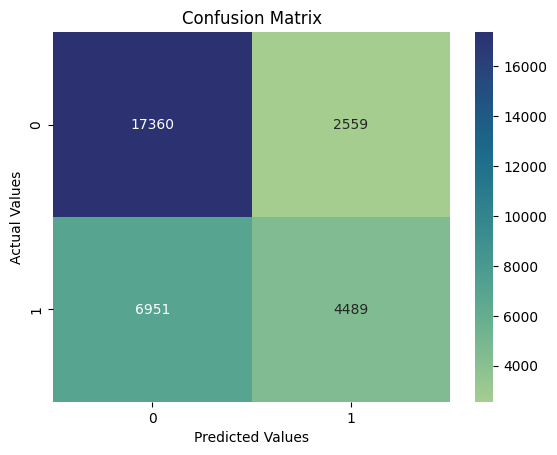

In [28]:
# for naive bayes

print(metrics.accuracy_score(NB_y_pred,y_test))
print(metrics.classification_report(y_test, NB_y_pred))
print(cmatrix(NB_model))

0.774642048534711
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     19919
           1       0.72      0.62      0.67     11440

    accuracy                           0.77     31359
   macro avg       0.76      0.74      0.75     31359
weighted avg       0.77      0.77      0.77     31359

[[17183  2736]
 [ 4331  7109]]
None


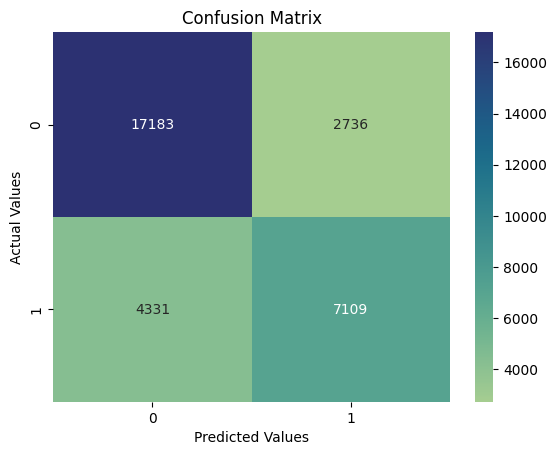

In [ ]:
# for XGBoost

print(metrics.accuracy_score(XGB_y_pred,y_test))
print(metrics.classification_report(y_test, XGB_y_pred))
print(cmatrix(XGB_model))

# DL modelling

In [ ]:
import tensorflow
import keras

from keras import models
from keras.models import Model
from keras.models import load_model
from keras.layers import Embedding
from keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU, MaxPooling2D,LSTM, BatchNormalization, Activation, Conv2D
from keras.models import Sequential

In [ ]:
max_words = 1000
max_len = 26

LSTM_model = Sequential()
LSTM_model.add(Embedding(200,40, input_length=26))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(100))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(1, activation='sigmoid'))

LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(LSTM_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 40)            8000      
                                                                 
 dropout (Dropout)           (None, 26, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
LSTM_model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
995/995 [==============================] - 52s 48ms/step - loss: 0.6312 - accuracy: 0.6484
Epoch 2/100
995/995 [==============================] - 50s 50ms/step - loss: 0.5941 - accuracy: 0.6817
Epoch 3/100
995/995 [==============================] - 49s 49ms/step - loss: 0.5805 - accuracy: 0.6954
Epoch 4/100
995/995 [==============================] - 50s 51ms/step - loss: 0.5704 - accuracy: 0.7028
Epoch 5/100
995/995 [==============================] - 50s 50ms/step - loss: 0.5598 - accuracy: 0.7099
Epoch 6/100
995/995 [==============================] - 47s 47ms/step - loss: 0.5488 - accuracy: 0.7185
Epoch 7/100
995/995 [==============================] - 46s 47ms/step - loss: 0.5425 - accuracy: 0.7237
Epoch 8/100
995/995 [==============================] - 52s 52ms/step - loss: 0.5354 - accuracy: 0.7297
Epoch 9/100
995/995 [==============================] - 47s 47ms/step - loss: 0.5292 - accuracy: 0.7340
Epoch 10/100
995/995 [==============================] - 47s 47ms/step - l

In [ ]:
LSTM_model.save('NameGenderClassification.hdf5')

In [ ]:
import pickle

pickle.dump(LSTM_model, open("model.pickle", 'wb'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [ ]:
pickle.dump(vectorizer, open("cv.pickle", "wb"))

In [ ]:
# Function to access model

def predict(name):
    name_samplevector = cv.transform([name]).toarray()
    prediction = LSTM_model.predict([name_samplevector])

    if prediction >=0.5:
        gen = 'Male ♂'
    else:
        gen = 'Female ♀'
    print(name, 'is a', gen)

In [ ]:
predict('Hanvee')

1/1 [==============================] - 1s 531ms/step
Hanvee is a Female ♀


In [ ]:
predict('ojas')

1/1 [==============================] - 0s 23ms/step
ojas is a Male ♂


In [ ]:
predict('kiran')

1/1 [==============================] - 0s 22ms/step
kiran is a Female ♀


In [ ]:
predict('karthik')

1/1 [==============================] - 0s 23ms/step
karthik is a Male ♂


In [ ]:
predict('ansh')

1/1 [==============================] - 0s 24ms/step
ansh is a Male ♂


In [ ]:
predict('manpreet')

1/1 [==============================] - 0s 24ms/step
manpreet is a Female ♀


In [ ]:
predict('maninder')

1/1 [==============================] - 0s 31ms/step
maninder is a Male ♂


In [ ]:
predict('pankaj')

1/1 [==============================] - 0s 24ms/step
pankaj is a Female ♀
